In [13]:
import applied_sam as asam
import matplotlib.pyplot as plt
from PIL import Image

In [14]:
# Parameters
image_path = "img.png"
promt = 'people'
threshold = None

In [15]:
# Prediction 
masks, boxes, phrases, logits = asam.prompt_sam(promt, image_path, warns=False)

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded from /Users/fgarridovalenz/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight'])


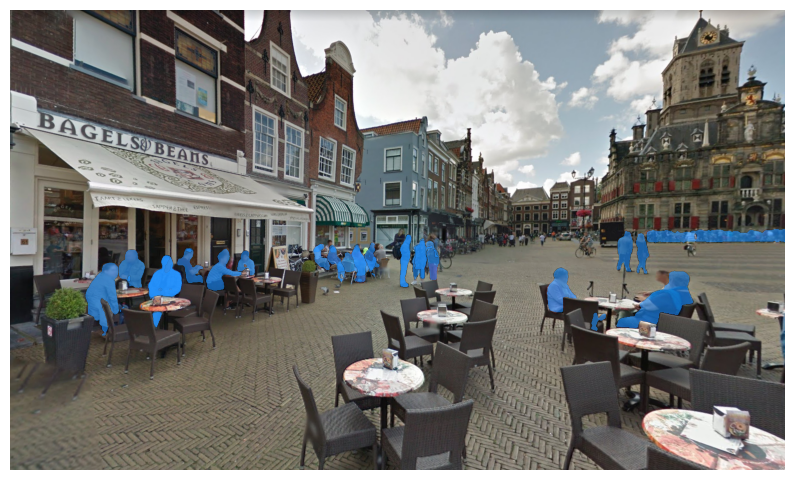

In [17]:
# Ploting
if threshold is not None:
    t = threshold
else:
    t = 0

image_pil = Image.open(image_path).convert("RGB")
plt.figure(figsize=(10,10))
plt.imshow(image_pil)
for m,l in zip(masks, logits):
    if l >= t:
        asam.show_mask(m, plt.gca())
#show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show() 